

# <font color=blue><div align="center">Metaheuristics -- Practical Work </div></font>

# 1. Introduction

## 1.1. Recalls about metaheuristics

**Definition of metaheuristics**

<div style="text-align: justify"> 
According to the website of Metaheuristics Network,
"<i>A metaheuristic is a set of concepts that can be used to define heuristic methods that can be applied to a wide set of different problems. In other words, a metaheuristic can be seen as a general algorithmic framework which can be applied to different optimization problems with relatively few modifications to make them adapted to a specific problem.</i>"
</div>

<div style="text-align: justify"> 
In operations research, metaheuristics are often used in the context of NP-hard optimization problems. While exact algorithms would fail to find the optimal solution to such optimization problems as their complexity is too large, (well-designed) metaheuristics are able to find <i>good-quality solutions</i>. As the definition above explains it, metaheuristics are generic approaches that can then be adapted to solve given optimization problems.
</div>

**Classification of metaheuristics**

<div style="text-align: justify"> 
There are a wide variety of metaheuristics and a number of properties with respect to which to classify them, namely: local search vs global search; single-solution vs population-based; nature-inspired and metaphor-based metaheuristics; etc. <br>
(See the following picture corresponding to the Euler diagram of the different classifications of metaheuristics).
</div>
<img src="Figures/metaheuristics_classification.png" width="500" height="500" />

## 1.2. Objective of this practical work

<div style="text-align: justify"> 
The objective of this practical work is to implement and apply one kind of metaheuristic, a <i>Genetic Algorithm (GA)</i>, on a specific optimization problem, the <i>Traveling Salesman Problem (TSP)</i>.
</div>

## 1.3. Recalls about the TSP

**Description of the TSP**

<div style="text-align: justify"> 
The TSP can be described as follows: given a set of cities and the distances between each pair of cities, the Travelling Salesman Problem consists in finding the shortest route that visits each city and returns to the origin city.
</div>

<div style="text-align: justify"> 
The following picture is an illustration of a feasible route on an instance of 50 cities.
</div>
<img src="Figures/TSP_plot.png" width="400" height="500" />

**TSP constraints**

There are *two essential constraints* to keep in mind:
1. each city must be visited *exactly one time*;
2. the route must *start and end* at the same city.

So the total distance of the route must be calculated accordingly.

## 1.4. Description of the GA approach

#### Quick overview about GA

<div style="text-align: justify"> 
Genetic Algorithms are fascinating approaches for solving optimization and search problems. Very briefly, a GA is a kind of metaheuristic inspired by the process of natural selection that belongs to the larger class of <i>Evolutionary Algorithms (EA)</i>. GA is commonly used to generate high-quality solutions to optimization and search problems by relying on biologically inspired operators such as crossover, mutation and selection.
</div>

(A summary about GA can be found [here](https://towardsdatascience.com/introduction-to-optimization-with-genetic-algorithm-2f5001d9964b)).

#### Terminology about GA in the context of the TSP

Let’s start with a few definitions rephrased in the context of the TSP:
- a *gene*: a city, represented as (x, y) coordinates;
- an *individual* (or a chromosome): a single route satisfying the two constraints above;
- a *population*: a collection of individuals, here a collection of routes;
- a *generation*: the *fixed-sized* population at a time step ;
- the *fitness score* of an individual: a score that quantifies how good each route is, which is here correlated to how short the total distance is;
- the *elites*: the best individuals of the population, based on their respective fitness score;
- the *parents* of a *child*: the two routes that were combined to get the new route;
- a *mating pool*: a collection of parents;
- the *breeding* process: a process combining parents to get a child;
- the *mutation* process: a process introducing random variations in a population;
- the *elitism* principle: a principle according to which best individuals are automatically carried into the next generation.

#### Main steps of the implemented GA

The GA that we are going to implement proceeds in the following steps:
1. create an initial population of individuals as the first generation;
2. compute the fitness over the generation in order to rank the individuals;
3. select the best individuals to form the group of elites;
4. create the group formed by new individuals as follows
    1. select a mating pool;
    2. breed parents of the mating pool to get new individuals and form a large group of children;
    3. apply random mutations to the children;
    4. compute the fitness over the children in order to rank them;
    5. select the best children to form the group of best children in order to complement the group of elites;
5. merge the groups of elites and best-children to form a new generation;
6. repeat steps 2-5 with the new generation until reaching a stopping criterion;
7. select the best individuals of the last generation.

<img src="Figures/GA_steps.png" width="800" height="800" />

**Note 1:** we choose to design a GA with generations of the *same fixed size*.

**Note 2:** through this practical work, the ways that the different steps are implemented (fitness definition, mating pool selection, breeding and mutation processes, etc.) are just *modelisation choices*; you are free to change them and choose to implement additional or other strategies to improve your GA.

# 2. Preliminary work

Before getting into the implementation of the GA, we need to prepare some basic functions that will be used in the implementation of the main steps. **You will not have much to do in this part**.

**Note:** if any of the following packages is not installed on your machine, please run the code line `!pip3 install packageName` (or `!pip install packageName`) in a code cell to install it. 

In [1]:
import numpy as np
import random
import csv
import time
import matplotlib.pyplot as plt
from pprint import pprint
import copy

## 2.1. About the cities

A `city` will be simply implemented as a couple `(x, y)` corresponding to its (integer) coordinates.

For instance,

In [2]:
city0 = (2, 3)

A basic operation will need to do is to compute the distance between two cities.

The function `computeDistanceBetweenCities(city1, city2)` computes the Euclidean norm between the coordinates of `city1` and `city2`.

In [3]:
def computeDistanceBetweenCities(city1, city2):
    return np.linalg.norm(np.array(city2) - np.array(city1), ord = 2)

For instance,

In [4]:
city1 = (0, 0)
city2 = (3, 4)
print(computeDistanceBetweenCities(city1, city2))

5.0


## 2.2. About TSP instances

### 2.2.1. About random TSP instances

A TSP `instance` will be implemented as a list of cities.

In order to create random TSP instances, we implement the function `createRandomInstance(nbCities, length)` which creates an `instance` of `nbCities` setting their coordinates randomly in $\{ 0, ...,$ `length` $\} \times \{ 0, ...,$ `length` $\}$.

In [5]:
def createRandomInstance(nbCities, length = 200):
    instance = []
    for i in range(0, nbCities):
        instance.append((int(random.random()*(length + 1)),
                         int(random.random()*(length + 1))))
    return instance

For instance,

In [6]:
nbCities = 10
instance = createRandomInstance(nbCities)
print(instance)

[(16, 29), (150, 88), (162, 151), (34, 198), (156, 0), (32, 180), (126, 177), (67, 3), (81, 200), (154, 65)]


### 2.3.2. About fixed TSP instances

In order to compare the results of your GA with other students, we need to work on common instances. Several data sets of TSP instances are given as .csv files.

The function `loadFixedInstance(fileName)` returns the TSP `instance` stored in the file `fileName`.

**Note:** the .csv files must be a directory Instances located in the same directory as your Jupyter file.

In [7]:
def loadFixedInstance(fileName):
    folderName = "Instances/"
    if not (".csv" in fileName):
        fileName += ".csv"
    if not (folderName in fileName):
        fileName = folderName + fileName
    with open(fileName) as file:
        lines = csv.reader(file)
        instance = []
        for line in lines:
            instance.append((int(line[0]), int(line[1])))
    return instance

For instance,

In [8]:
fileName = "TSPInstance10.csv"
exampleInstance = loadFixedInstance(fileName)
print(exampleInstance)

[(0, 35), (73, 93), (121, 149), (68, 187), (196, 130), (103, 137), (163, 196), (116, 25), (139, 181), (50, 123)]


# 3. Implementation of the GA's main steps

Now, we can start implementing the GA. We will follow the main steps presented in the Introduction. **You will have work to do in this part!**

> Implementation instructions will be presented this way. Code to implement will be notified with comment lines `# To be completed - Begin` and `# To be completed - End`. *Do not overwrite* variables whose names start with `example`; there are here to check your code.

## 3.1. Step 1 - Create an initial population of individuals

### 3.1.1. Create random individuals

First, we need a function to create various random feasible individuals, *i.e.* a route that satisfies the constraints 1 and 2.

> Implement a function `createRandomIndividual(instance)` which takes as input a TSP `instance` and returns a random feasible `individual`. The returned `individual` is a list of cities, like the instance but here representing a route. To create such a route, this function adds into the route each city of the instance in a random order; in other words, the function computes a random permutation of the list of cities which form the instance.

In [9]:

def generate_instance(NW=2, NJ=9, ):

    I = dict()

    for w in range(NW):
        I["h" + str(w)] = dict()
        I["h" + str(w)]["pos"] = (random.randint(0, 100), random.randint(0, 100))
        I["h" + str(w)]["alpha"] = random.randint(60*6, 60*8)
        I["h" + str(w)]["beta"] = random.randint(60*16, 60*20)
        I["h" + str(w)]["done"] = None

    for j in range(NJ):
        I["j" + str(j)] = dict()
        I["j" + str(j)]["pos"] = (random.randint(0, 100), random.randint(0, 100))
        begin = random.randint(60*7, 60*19)
        duration = random.randint(30, 60*1.5)
        end = begin + duration + random.randint(30, duration)
        I["j" + str(j)]["begin"] = begin
        I["j" + str(j)]["end"] = end
        I["j" + str(j)]["duration"] = duration
        I["j" + str(j)]["done"] = None
        
    matrix_dist = dict()
    for key1, value1 in I.items():
        for key2, value2 in I.items():
            matrix_dist[(key1, key2)] = abs(value1["pos"][0] - value2["pos"][0]) + abs(value1["pos"][1] - value2["pos"][1])
    return I, matrix_dist

In [10]:
dict_I, matrix_dist = generate_instance(NW=2, NJ=9, )
pprint(dict_I)

{'h0': {'alpha': 417, 'beta': 1103, 'done': None, 'pos': (59, 29)},
 'h1': {'alpha': 459, 'beta': 1127, 'done': None, 'pos': (94, 14)},
 'j0': {'begin': 950,
        'done': None,
        'duration': 76,
        'end': 1080,
        'pos': (19, 52)},
 'j1': {'begin': 981,
        'done': None,
        'duration': 76,
        'end': 1114,
        'pos': (24, 97)},
 'j2': {'begin': 881,
        'done': None,
        'duration': 69,
        'end': 1018,
        'pos': (31, 45)},
 'j3': {'begin': 592,
        'done': None,
        'duration': 79,
        'end': 749,
        'pos': (20, 91)},
 'j4': {'begin': 668,
        'done': None,
        'duration': 89,
        'end': 799,
        'pos': (89, 35)},
 'j5': {'begin': 754, 'done': None, 'duration': 86, 'end': 876, 'pos': (0, 4)},
 'j6': {'begin': 518,
        'done': None,
        'duration': 38,
        'end': 593,
        'pos': (21, 76)},
 'j7': {'begin': 950,
        'done': None,
        'duration': 82,
        'end': 1088,
        

In [11]:
a = dict_I.get('h0')
print(a)

{'pos': (59, 29), 'alpha': 417, 'beta': 1103, 'done': None}


In [12]:
pprint(matrix_dist)

{('h0', 'h0'): 0,
 ('h0', 'h1'): 50,
 ('h0', 'j0'): 63,
 ('h0', 'j1'): 103,
 ('h0', 'j2'): 44,
 ('h0', 'j3'): 101,
 ('h0', 'j4'): 36,
 ('h0', 'j5'): 84,
 ('h0', 'j6'): 85,
 ('h0', 'j7'): 68,
 ('h0', 'j8'): 24,
 ('h1', 'h0'): 50,
 ('h1', 'h1'): 0,
 ('h1', 'j0'): 113,
 ('h1', 'j1'): 153,
 ('h1', 'j2'): 94,
 ('h1', 'j3'): 151,
 ('h1', 'j4'): 26,
 ('h1', 'j5'): 104,
 ('h1', 'j6'): 135,
 ('h1', 'j7'): 118,
 ('h1', 'j8'): 44,
 ('j0', 'h0'): 63,
 ('j0', 'h1'): 113,
 ('j0', 'j0'): 0,
 ('j0', 'j1'): 50,
 ('j0', 'j2'): 19,
 ('j0', 'j3'): 40,
 ('j0', 'j4'): 87,
 ('j0', 'j5'): 67,
 ('j0', 'j6'): 26,
 ('j0', 'j7'): 45,
 ('j0', 'j8'): 73,
 ('j1', 'h0'): 103,
 ('j1', 'h1'): 153,
 ('j1', 'j0'): 50,
 ('j1', 'j1'): 0,
 ('j1', 'j2'): 59,
 ('j1', 'j3'): 10,
 ('j1', 'j4'): 127,
 ('j1', 'j5'): 117,
 ('j1', 'j6'): 24,
 ('j1', 'j7'): 35,
 ('j1', 'j8'): 113,
 ('j2', 'h0'): 44,
 ('j2', 'h1'): 94,
 ('j2', 'j0'): 19,
 ('j2', 'j1'): 59,
 ('j2', 'j2'): 0,
 ('j2', 'j3'): 57,
 ('j2', 'j4'): 68,
 ('j2', 'j5'): 72,
 ('

In [13]:
random_list = random.sample(range(10), 10)
random_list

[7, 9, 6, 2, 5, 4, 8, 3, 1, 0]

# heuristica: 

estaba pensado en hacer como algunos razonamientos lógicos para podar el problema, por ejemplo, decir que nunca jamas dos nodos podrán estar dentro del mimo trabajador, también darle una cierta preferencia a elegir nodos cercanos para ir de un lugar al otro

In [14]:
def w_do_job_j_after_i(dict_I, w, j, i, travel, not_available_jobs):
    if j in not_available_jobs:
        return False, None, None
    # Get the worker's data
    dictI = copy.deepcopy(dict_I)
    worker_key = f"h{w}"
    worker_data = dictI.get(worker_key)

    # Get the job's data
    job_key = f"j{j}"
    #print('job_key',job_key)
    job_data = dictI.get(job_key)
    #print('job_data',job_data)
    
    # Get the node_i's data
    #print('i',i)
    #print('travel[i]', travel[i])
    i_data = dictI.get(travel[i])
    #print('i_data',i_data)
    
    
    job_data_aux = copy.deepcopy(job_data)
    job_data_aux = copy.deepcopy(job_data)

    # Calculate the time it takes to get from the worker's position to the job's position
    
    #travel_time = abs(i_data["pos"][0] - job_data["pos"][0]) + abs(i_data["pos"][1] - job_data["pos"][1])
    travel_time = matrix_dist[(travel[i], job_key)]

    primer_a_contar = 0
    
    nodos_a_donear = dict()
    nodos_a_donear[job_key] = copy.deepcopy(job_data)
    
    if 'h' in travel[i]:
        # Check if the worker can do the job
        T = max(worker_data["alpha"] + travel_time, job_data["begin"]) + job_data["duration"]
        if job_data["end"] < T:
            return False, None, None
        else:
            primer_a_contar = 1
            #last_T = T
            #print(job_data)
    else:
        # Check if the worker can do the job
        T = max(i_data["end"] + travel_time, job_data["begin"]) + job_data["duration"]
        if job_data["end"] < T:
            return False, None, None
        else:
            primer_a_contar = 1
            #last_T = T
          #  #print(job_data)
    
    nodo_precedente = job_key
    inicializacion = True
    for node in travel[i + primer_a_contar:]:
        #print('node',node)
        #print('nodo_precedente',nodo_precedente)
        node_data = I.get(node)
        nodos_a_donear[node] = copy.deepcopy(node_data)
        nodo_precedente_data = I.get(nodo_precedente)
        nodos_a_donear[nodo_precedente] = copy.deepcopy(nodo_precedente_data)
        nodos_a_donear[nodo_precedente]['done'] = T

            #print("ya pasó una iteracion")
        #print('node_data',node_data)
        #print('nodo_precedente_data',nodo_precedente_data)
        #travel_time = abs(node_data["pos"][0] - nodo_precedente_data["pos"][0]) + abs(node_data["pos"][1] - nodo_precedente_data["pos"][1])
        travel_time = matrix_dist[(node, nodo_precedente)]
        if 'h' in node:
            #print("aaaaaaaa", nodo_precedente, nodos_a_donear[nodo_precedente]["done"])
            #print('nodos_a_donear[nodo_precedente]', nodos_a_donear[nodo_precedente])
            T = nodos_a_donear[nodo_precedente]["done"] + travel_time
            if node_data["beta"] < T:
                #print('pas possible 1:', node_data["beta"], T)
                return False, None, None
        else:
            T = max(nodos_a_donear[nodo_precedente]["done"] + travel_time, node_data["begin"]) + node_data["duration"]
            if node_data["end"] < T:
                #print('pas possible 1:', node_data["end"], T)
                return False, None, None
        
        nodos_a_donear[node]["done"] = T
        #print('nodos_a_donear[node][done]', nodos_a_donear[node]["done"])
        nodo_precedente = node
        #print("bbbbbbbbbb", nodo_precedente, nodos_a_donear[nodo_precedente]["done"])
        nodo_precedente_data = node_data
    for key, value in nodos_a_donear.items():
        #print("key: ", key, " | value: ", value)
        dictI[key]['done'] = value['done']
    travel.insert(i+1, f"j{j}")
    
    return True, travel, dictI

In [15]:
def createRandomIndividual(dict_I,NW, NJ):
    dictI = copy.deepcopy(dict_I)
    sol = dict()
    not_available_jobs = set()
    random_list_w = random.sample(range(NW), NW)
    random_list_j = random.sample(range(NJ), NJ)
    for w in random_list_w:
        travel = ['h'+str(w), 'h'+str(w)]
        i = 0
        for j in random_list_j:
            if j not in not_available_jobs:
                w_can_do_job_j, sol_w, dictI0 = w_do_job_j_after_i(dictI, w, j, i, travel, not_available_jobs)
                if w_can_do_job_j:
                    not_available_jobs.add(j)
                    travel = sol_w
                    dictI = dictI0
                    #print('------')
        sol['w'+str(w)] = travel
    return sol, not_available_jobs, dictI

In [16]:
I, matrix_dist = generate_instance(2, 9)
sol, not_available_jobs, dictI  = createRandomIndividual(dict_I, 2, 9)

In [17]:
sol

{'w1': ['h1', 'j6', 'j4', 'h1'], 'w0': ['h0', 'j1', 'h0']}

In [18]:
not_available_jobs

{1, 4, 6}

In [19]:
sol['w0']

['h0', 'j1', 'h0']

In [21]:
#I

In [22]:
pprint(dictI)

{'h0': {'alpha': 417, 'beta': 1103, 'done': 1090, 'pos': (59, 29)},
 'h1': {'alpha': 459, 'beta': 1127, 'done': 880, 'pos': (94, 14)},
 'j0': {'begin': 950,
        'done': None,
        'duration': 76,
        'end': 1080,
        'pos': (19, 52)},
 'j1': {'begin': 981,
        'done': 1057,
        'duration': 76,
        'end': 1114,
        'pos': (24, 97)},
 'j2': {'begin': 881,
        'done': None,
        'duration': 69,
        'end': 1018,
        'pos': (31, 45)},
 'j3': {'begin': 592,
        'done': None,
        'duration': 79,
        'end': 749,
        'pos': (20, 91)},
 'j4': {'begin': 668, 'done': 813, 'duration': 89, 'end': 799, 'pos': (89, 35)},
 'j5': {'begin': 754, 'done': None, 'duration': 86, 'end': 876, 'pos': (0, 4)},
 'j6': {'begin': 518, 'done': 556, 'duration': 38, 'end': 593, 'pos': (21, 76)},
 'j7': {'begin': 950,
        'done': None,
        'duration': 82,
        'end': 1088,
        'pos': (39, 77)},
 'j8': {'begin': 975,
        'done': None,
     

### 3.2.2. Create a random population

The previous function `createRandomIndividual(instance)` creates *only one individual*, but the GA needs *a full population*. Let's implement a function for that.

> Implement a function `createInitialPopulation(populationSize, instance)`, which takes as inputs the size of the population `populationSize` and a TSP `instance`, which create an initial population.

**Note 1:** this function is only use to create the initial population; subsequent generations of the population will be produced through breeding and mutation as well as elitism.

**Note 2:** the variable `populationSize` will be a hyper-parameter of the GA final function called `runGeneticAlgorithm(...)` that you, as an user of the algorithm, will set to a value that seems good to you.

In [23]:
def createInitialPopulation(dict_I,NW, NJ, populationSize):
    population = []
    # To be completed - Begin
    for i in range(populationSize):
        sol, not_available_jobs, dictI  = createRandomIndividual(dict_I, 2, 9)
        instance = {
            'sol': sol,
            'not_available_jobs': not_available_jobs,
            'dictI': dictI
        }
        population.append(instance)
    # To be completed - End
    return population

In [28]:
i = 0
for individual in createInitialPopulation(dict_I, 2, 9, 10):
    i += 1
    print('i: ', 1)
    pprint(individual)
    print()

i:  1
{'dictI': {'h0': {'alpha': 417, 'beta': 1103, 'done': 880, 'pos': (59, 29)},
           'h1': {'alpha': 459, 'beta': 1127, 'done': 880, 'pos': (94, 14)},
           'j0': {'begin': 950,
                  'done': None,
                  'duration': 76,
                  'end': 1080,
                  'pos': (19, 52)},
           'j1': {'begin': 981,
                  'done': None,
                  'duration': 76,
                  'end': 1114,
                  'pos': (24, 97)},
           'j2': {'begin': 881,
                  'done': None,
                  'duration': 69,
                  'end': 1018,
                  'pos': (31, 45)},
           'j3': {'begin': 592,
                  'done': None,
                  'duration': 79,
                  'end': 749,
                  'pos': (20, 91)},
           'j4': {'begin': 668,
                  'done': 813,
                  'duration': 89,
                  'end': 799,
                  'pos': (89, 35)},
           'j5': {

## 3.2. Step 2 - Compute the fitness over the population in order to rank individuals


### 3.2.1. Compute the fitness score of an individual

Usually in GA, the larger the indivual's fitness score, the better. We propose to define the fitness score of an individual as the *inverse of its total distance* - an individual being a route. Thus, the larger the fitness score, the shortest the total distance, which is what we are looking for.

> Implement a function `computeTotalDistance(route)` which takes a `route` (*i.e.* an individual) and returns the total distance of the route.

**Note:** do not forget that the route is a *loop* according to the constraint 2 of the problem.

In [29]:
def computeFitnessScore(dict_I, individual):
    fitnessScore = 0
    for job_done in individual['not_available_jobs']:
        fitnessScore += dict_I['j'+str(job_done)]['duration']
    return fitnessScore

For instance, with the previous `exampleIndividual`, you should get a fitness score of about 0.00085.

In [32]:
for individual in createInitialPopulation(dict_I, 2, 9, 1):
    print(computeFitnessScore(dict_I, individual))

189


### 3.2.2. Compute ranking data about the population

Now, that we are able to score an individual, we can rank a population of individuals by ordering them by decreasing order of fitness scores. Actually, it will be useful for later to store the fitness score of each individual. Thus, instead of sorting the individuals, we propose to compute two lists: a first list `rankedPopulationIndices` which contains the indices of individuals of the population ordered by decreasing order of corresponding fitness scores; a second list `rankedPopulationFitnessScores` which contains the values of fitness scores by decreasing order.

> Implement a function `computeRankingData(population)` which takes a `population` as an input and returns the pair of lists `(rankedPopulationIndices, rankedPopulationFitnessScores)`.

**Note:** this function computing the ranking data can be apply to *any population*; it can be use to rank an entire generation of individuals as well as a large list of children like in step 4.

In [36]:
def computeRankingData(population):
    rankedPopulationIndices, rankedPopulationFitnessScores = [], []
    # To be completed - Begin
    list_aux = list()
    for i in range(len(population)):
        list_aux.append((i, computeFitnessScore(dict_I, population[i])))
    list_aux = sorted(list_aux, key=lambda x: x[1], reverse = True)
    for i in list_aux:
        rankedPopulationIndices.append(i[0])
        rankedPopulationFitnessScores.append(i[1])
    # To be completed - End
    rankingData = rankedPopulationIndices, rankedPopulationFitnessScores
    return rankingData

In [37]:
population = createInitialPopulation(dict_I, 2, 9, 10)
testRankingData = computeRankingData(population)
testRankedPopulationIndices = testRankingData[0]
testRankedPopulationFitnessScores = testRankingData[1]
print(testRankedPopulationIndices)
print(testRankedPopulationFitnessScores)

[4, 8, 5, 6, 3, 7, 9, 0, 2, 1]
[288, 254, 206, 203, 196, 193, 193, 162, 127, 107]


## 3.3. Step 3 - Select the best individuals to form the group of elites

We propose that the GA integrates some elitism principle: the best individuals of the a given generation are carried over the next one. This group is so-called the group of *elites*. As we can get the ranking data of any population, we can now implement a function which selects the `nbBestIndividuals` best individuals of a population (where `nbBestIndividuals` is a non-negative integer).

> Implement a function `selectBestIndividuals(population, rankedPopulationIndices, nbBestIndividuals)` which returns the `nbBestIndividuals` best individuals of a given `population`, given the list of ranking indices `rankedPopulationIndices`.

**Note 1:** here again, this best-selection function can be apply to any population; it can be used to extract the best individuals of an entire generation of individuals as well as a large list of children like in step 4.

**Note 2:** the size of the group of elites will be a hyper-parameter `nbElites` of the GA final function called `runGeneticAlgorithm(...)`.

In [40]:
def selectBestIndividuals(population, rankedPopulationIndices, nbBestIndividuals):
    bestIndividuals = []
    # To be completed - Begin
    for i in range(nbBestIndividuals):
        bestIndividuals.append(population[rankedPopulationIndices[i]])
    # To be completed - End
    return bestIndividuals

In [43]:
for elite in selectBestIndividuals(population, testRankedPopulationIndices, 2):
    print(elite)

{'sol': {'w1': ['h1', 'j6', 'j3', 'h1'], 'w0': ['h0', 'j4', 'j7', 'h0']}, 'not_available_jobs': {3, 4, 6, 7}, 'dictI': {'h0': {'pos': (59, 29), 'alpha': 417, 'beta': 1103, 'done': 933}, 'h1': {'pos': (94, 14), 'alpha': 459, 'beta': 1127, 'done': 852}, 'j0': {'pos': (19, 52), 'begin': 950, 'end': 1080, 'duration': 76, 'done': None}, 'j1': {'pos': (24, 97), 'begin': 981, 'end': 1114, 'duration': 76, 'done': None}, 'j2': {'pos': (31, 45), 'begin': 881, 'end': 1018, 'duration': 69, 'done': None}, 'j3': {'pos': (20, 91), 'begin': 592, 'end': 749, 'duration': 79, 'done': 769}, 'j4': {'pos': (89, 35), 'begin': 668, 'end': 799, 'duration': 89, 'done': 757}, 'j5': {'pos': (0, 4), 'begin': 754, 'end': 876, 'duration': 86, 'done': None}, 'j6': {'pos': (21, 76), 'begin': 518, 'end': 593, 'duration': 38, 'done': 556}, 'j7': {'pos': (39, 77), 'begin': 950, 'end': 1088, 'duration': 82, 'done': 913}, 'j8': {'pos': (52, 12), 'begin': 975, 'end': 1074, 'duration': 61, 'done': None}}}
{'sol': {'w0': ['h0

## 3.4. Step 4 - Create the group formed by new individuals as follows

<div style="text-align: justify"> 
    In parallel to the direct transfer of few  <i>elites</i> to the next <i>generation</i> of individuals according to elitism, the GA must create new individuals, so-called <i>children</i>, by breeding individuals, so-called <i>parents</i>, in order to complete the next generation. The generation of these <i>children</i> goes by several substeps: selecting a <i>mating pool</i>, bredding <i>parents</i> to get <i>children</i>, mutate <i>children</i> and select the best ones. Usually, the size of <i>mating pool</i> is smaller than the size of a  <i>generation</i> and the size of the collection of <i>children</i> before selection is larger than the size of a  <i>generation</i>.
</div>

### 3.4.1. Step 4.A - Select a mating pool

<div style="text-align: justify"> 
    In order to produce <i>children</i>, we must define a <i>mating pool</i> that is to say a collection of <i>parents</i> by selecting some individuals of the current <i>generation</i>. There are various way to form such a <i>mating pool</i>. Generally, the selection uses some randomness while giving more chances to best individuals to be selected as parents. Randomness is beneficial as it maintains diversity among the individuals. Taking into account the quality of the individuals is also beneficial as they are likely to produce together <i>children</i> of good quality.
</div>

<div style="text-align: justify"> 
Two common approaches for selecting the <i>mating pool</i> are the <i>fitness proportionate selection (a.k.a. “roulette wheel selection”)</i> or the <i>tournament selection</i>.
</div><br></br>
    1. In the fitness proportionate selection, the relative fitness of each individual of the population is used to assign a probability of selection; in other words, each individual is associated with a probability of being selected that corresponds to the ratio of its fitness by the total fitness of the population, such that a non-uniform probability distribution is defined over the individuals of the population; the individuals with larger fitness values are more likely to be selected.
    <br></br><br></br>
    2. In the tournament selection, a fixed number of individuals are randomly selected among the population and the one with the highest fitness values in the selected group is added to the mating pool; these steps are repeated a certain amount of times to choose the other parents.

We propose to use the fitness proportionate selection (a.k.a. “roulette wheel selection”).

> Implement the function `selectMatingPool(population, rankedPopulationIndices, rankedPopulationFitnessScores, nbParents)`, which takes as inputs a `population`, its corresponding ranking data and the number of parents `nbParents`, and which returns a list of individuals as a mating pool.

**Note 1:** we do not care if an individual is selected several times during the process.

**Note 2:** the variable `nbParents` will be a hyper-parameter of the GA final function called `runGeneticAlgorithm(...)`.

In [47]:
def selectMatingPool(population, rankedPopulationIndices, rankedPopulationFitnessScores, nbParents):
    
    matingPool = []
    
    # Prepare the roulette wheel
    # (i.e. compute the cumulative ratios of fitness scores over the population)
    # To be completed - Start
    ratio_Scores = list()
    sum_Scores = sum(rankedPopulationFitnessScores)
    for i in rankedPopulationFitnessScores:
        ratio_Scores.append(i / sum_Scores)
    # To be completed - End
    
    # Play the roulette wheel several times to form the mating pool
    # (i.e repeat picking an individual according to the random distribution of the fitness score ratios)
    # To be completed - Start
    #print("HERE THE PROBLEM 2: ", len(population), len(ratio_Scores))
    try:
        matingPool = random.choices(population, weights=ratio_Scores, k=nbParents)
    except:
        print('population: ', population)
        print('rankedPopulationFitnessScores: ', rankedPopulationFitnessScores)
        print('rankedPopulationIndices: ', rankedPopulationIndices)
        print('population[rankedPopulationIndices[0]]: ', population[rankedPopulationIndices[0]])
        print('ratio_Scores: ', ratio_Scores)
    # To be completed - End
    
    return matingPool

In [50]:
for parent in selectMatingPool(population, testRankedPopulationIndices, 
                               testRankedPopulationFitnessScores, 2):
    print(parent)

{'sol': {'w0': ['h0', 'j6', 'j3', 'h0'], 'w1': ['h1', 'j0', 'h1']}, 'not_available_jobs': {0, 3, 6}, 'dictI': {'h0': {'pos': (59, 29), 'alpha': 417, 'beta': 1103, 'done': 862}, 'h1': {'pos': (94, 14), 'alpha': 459, 'beta': 1127, 'done': 1121}, 'j0': {'pos': (19, 52), 'begin': 950, 'end': 1080, 'duration': 76, 'done': 1026}, 'j1': {'pos': (24, 97), 'begin': 981, 'end': 1114, 'duration': 76, 'done': None}, 'j2': {'pos': (31, 45), 'begin': 881, 'end': 1018, 'duration': 69, 'done': None}, 'j3': {'pos': (20, 91), 'begin': 592, 'end': 749, 'duration': 79, 'done': 769}, 'j4': {'pos': (89, 35), 'begin': 668, 'end': 799, 'duration': 89, 'done': None}, 'j5': {'pos': (0, 4), 'begin': 754, 'end': 876, 'duration': 86, 'done': None}, 'j6': {'pos': (21, 76), 'begin': 518, 'end': 593, 'duration': 38, 'done': 556}, 'j7': {'pos': (39, 77), 'begin': 950, 'end': 1088, 'duration': 82, 'done': None}, 'j8': {'pos': (52, 12), 'begin': 975, 'end': 1074, 'duration': 61, 'done': None}}}
{'sol': {'w1': ['h1', 'j6

### 3.4.2. Step 4.B -  Breed parents of the mating pool to get new individuals and form a large group of children

<div style="text-align: justify"> 
Now that the mating pool can be created, children can be produced by breeding parents of the mating pool, via a process called <i>crossover</i>. The chosen <i>crossover</i> process must guarantee that the child produced by breeding two feasible parents is also feasible. We propose to use a special <i>crossover</i> process called <i>ordered crossover</i> as it ensures such feasibility transfer. Of course, other crossover could be designed.
</div>

#### Breed two parents
<div style="text-align: justify"> 
Before breeding the entire mating pool, let's start with two parents. Given two parents, that can be seen as two lists of <i>genes</i> of the same length, the <i>ordered crossover</i> process selects a random continuous portion of the first parent; it transfers this portion into the child by setting it at the exact same position in its list of <i>genes</i>; it then fills the remainders of the child's list, that are located at the left and at the right of the fixed portion, with <i>genes</i> from the second parent, in the order in which they appear in its list, without duplicating any genes that would already be in the fixed portion inherited from the first parent, and by jumping over the fixed portion. The following picture illustrates such an <i>ordered crossover</i>, where offspring is a synonym of child.
</div>

<img src="Figures/ordered_crossover.jpeg" width="300" height="300" />

> Implement a function `breedParents(parent1, parent2)` which produces a `child` from given `parent1` and `parent2` by applying the order ordered crossover process.

In [54]:
random.randint(0, 8)

3

aca se puede ser así:

parent1 = {
    'w0': ['h0', 'j1', 'j2', 'j3', 'j4', 'h0'],
    'w1': ['h1', 'j5', 'j6', 'j7', 'j8', 'h1'],
}
parent2 = {
    'w0': ['h0', 'j1', 'j3', 'j5', 'j7', 'h0'],
    'w1': ['h1', 'j2', 'j4', 'j6', 'j8', 'h1'],
}

-> chequeando factibildad obviamente: robarle dos seguidos a parent 1 w0, mezclarlo con parent 2 w0 y lo q sobra dejarlo igual.

child = {
    'w0': ['h0', 'j1', 'j2', 'j5', 'j7', 'h0'],
    'w1': ['h1', 'j3', 'j4', 'j6', 'j8', 'h1'],
}

In [65]:
def crossover(parent1, parent2):
    # Inicializar el cromosoma hijo
    child = {}

    # Recorrer cada trabajo en el cromosoma padre
    for work in parent1:
        # Generar un punto de cruce aleatorio
        crossover_point = random.randint(1, len(parent1[work]) - 1)

        # Combinar las tareas de los padres en el hijo, evitando repeticiones
        child[work] = parent1[work][:crossover_point] + [task for task in parent2[work][crossover_point:] if task not in parent1[work]]

    return child



In [68]:
def crossovers(parent1, parent2):
    # Inicializar el cromosoma hijo
    child = {}

    # Recorrer cada trabajo en el cromosoma padre
    for work in parent1:
        # Generar un punto de cruce aleatorio
        crossover_point = random.randint(1, len(parent1[work]) - 1)

        # Combinar las tareas de los padres en el hijo, evitando repetir elementos
        child[work] = []
        assigned_items = set()
        for item in parent1[work][:crossover_point] + parent2[work][crossover_point:]:
            if item not in assigned_items:
                child[work].append(item)
                assigned_items.add(item)

    return child


In [69]:
parent1 = {
    'w0': ['h0', 'j1', 'j2', 'j3', 'j4', 'h0'],
    'w1': ['h1', 'j5', 'j6', 'j7', 'j8', 'h1'],
}
parent2 = {
    'w0': ['h0', 'j1', 'j3', 'j5', 'j7', 'h0'],
    'w1': ['h1', 'j2', 'j4', 'j6', 'j8', 'h1'],
}

In [70]:
child = crossovers(parent1, parent2)
child

{'w0': ['h0', 'j1', 'j3', 'j5', 'j7'], 'w1': ['h1', 'j5', 'j6', 'j8']}

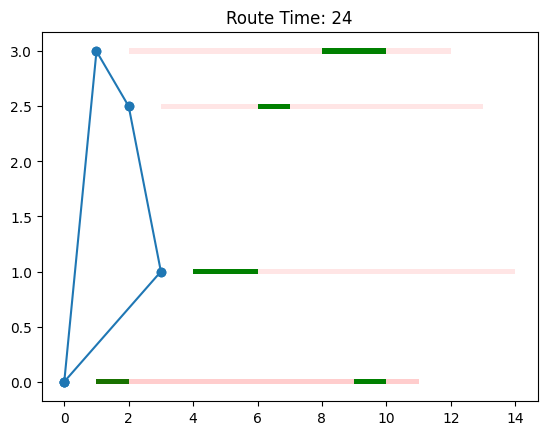

In [92]:
import matplotlib.pyplot as plt

# Define the list of points with their coordinates and time windows
points = [
    {'id': 1, 'x': 0, 'y': 0, 'start_time': 0, 'end_time': 1},
    {'id': 2, 'x': 3, 'y': 1, 'start_time': 0, 'end_time': 2},
    {'id': 3, 'x': 2, 'y': 2.5, 'start_time': 3, 'end_time': 4},
    {'id': 4, 'x': 1, 'y': 3, 'start_time': 6, 'end_time': 8},
    {'id': 5, 'x': 0, 'y': 0, 'start_time': 8, 'end_time': 9},
]

# Define the order in which the points are visited by the vehicle
route = [1, 2, 3, 4, 5]

# Create a scatter plot of the points
fig, ax = plt.subplots()
ax.scatter([p['x'] for p in points], [p['y'] for p in points])

# Add a bar for each point that shows the time window
for p in points:
    ax.barh(p['y'], 10, left=1+p['x'], height=0.05, color='red', alpha=0.1)
    ax.barh(p['y'], p['end_time'] - p['start_time'], left=1+p['x'] + p['start_time'], height=0.05, color='green')


# Connect the points in the order they are visited by the vehicle
route_x = [points[route[i]-1]['x'] for i in range(len(route))]
route_y = [points[route[i]-1]['y'] for i in range(len(route))]
ax.plot(route_x, route_y, '-o')

# Add a label for the route
route_time = sum([points[route[i]-1]['end_time'] for i in range(len(route))])
ax.set_title(f"Route Time: {route_time}")

plt.show()


In [32]:
def breedParents(parent1, parent2):
    child = []
    # To be completed - Begin
    random1 = random.randint(0, len(parent1)-2)
    random2 = random.randint(random1+1, len(parent1)-1)
    parent1_gen = parent1[random1 : random2]
    #print("le set: ", parent1_gen)
    i = 0
    j = 0
    while i <= len(parent2)-1:
        if parent2[i] not in parent1_gen:
            child.append(parent2[i])
            j += 1
            if j == random1: 
                i += 1
                break
        i += 1
    #print('child1: ', child) 
    child += parent1_gen
    #print('child2: ', child) 
    #if random2 < len(parent1):
    j = random2
    while i <= len(parent2)-1:
        if parent2[i] not in parent1_gen:
            child.append(parent2[i])
            j += 1
            if j == len(parent1)+1: break
        i += 1
    #print('child3: ', child) 
    # To be completed - End
    return child

Here is an example of a child obtained by breeding the two first parents of previous `exampleMatingPool` using the function `breedParents(parent1, parent2)`.

In [33]:
exampleParent1 = exampleMatingPool[0]
exampleParent2 = exampleMatingPool[-1]
exampleChild = [(73, 93), (139, 181), (163, 196), (50, 123), (68, 187), 
                (121, 149), (116, 25), (196, 130), (0, 35), (103, 137)]
print(exampleParent1)
print(exampleParent2)
print(exampleChild)

[(103, 137), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (0, 35), (116, 25), (73, 93), (196, 130)]
[(73, 93), (50, 123), (139, 181), (163, 196), (116, 25), (196, 130), (0, 35), (103, 137), (68, 187), (121, 149)]
[(73, 93), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (116, 25), (196, 130), (0, 35), (103, 137)]


> Test your function.

**Note:** due to randomness, you may have a different child.

In [34]:
print(exampleParent1)
print(exampleParent2)
print(breedParents(exampleParent1, exampleParent2))

[(103, 137), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (0, 35), (116, 25), (73, 93), (196, 130)]
[(73, 93), (50, 123), (139, 181), (163, 196), (116, 25), (196, 130), (0, 35), (103, 137), (68, 187), (121, 149)]
[(139, 181), (196, 130), (163, 196), (50, 123), (68, 187), (121, 149), (0, 35), (116, 25), (73, 93), (103, 137)]


#### Breed mating pool

Now we can generalize the breeding process to the entire mating pool, by breeding random pairs of parents of the mating pool.

> Implement a function `breedMatingPool(matingPool, nbChildren)` which returns a list of `nbChildren` childrens applying by applying the ordered crossover process over random pairs of parents from `matingPool`.

**Note:** the breeding process is used to produce a large collection of children, larger than the size a generation, as then a selection of the best children is applied; the variable `nbChildren` will be a hyper-parameter of the GA final function called `runGeneticAlgorithm(...)`.

In [98]:
def breedMatingPool(matingPool, nbChildren):
    children = []
    # To be completed - Start
    for i in range(nbChildren):
        parent1 = random.choice(matingPool)
        while True:
            parent2 = random.choice(matingPool)
            if parent2 != parent1: break
        children.append(breedParents(parent1, parent2))
    # To be completed - End
    return children

Here is an example of a list of 10 children obtained by breeding the previous `exampleMatingPool` using the function `breedMatingPool(matingPool, nbChildren)`.

In [36]:
exampleChildren = [
    [(0, 35), (103, 137), (116, 25), (68, 187), (196, 130), (50, 123), (163, 196), (121, 149), (139, 181), (73, 93)], 
    [(73, 93), (103, 137), (0, 35), (50, 123), (139, 181), (121, 149), (163, 196), (116, 25), (196, 130), (68, 187)], 
    [(103, 137), (139, 181), (116, 25), (68, 187), (196, 130), (50, 123), (163, 196), (121, 149), (0, 35), (73, 93)], 
    [(73, 93), (103, 137), (50, 123), (139, 181), (121, 149), (163, 196), (0, 35), (116, 25), (68, 187), (196, 130)],
    [(73, 93), (50, 123), (139, 181), (163, 196), (116, 25), (196, 130), (103, 137), (0, 35), (121, 149), (68, 187)],
    [(73, 93), (50, 123), (139, 181), (196, 130), (0, 35), (121, 149), (163, 196), (116, 25), (68, 187), (103, 137)],
    [(103, 137), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (0, 35), (116, 25), (73, 93), (196, 130)],
    [(73, 93), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (0, 35), (103, 137), (116, 25), (196, 130)],
    [(103, 137), (116, 25), (196, 130), (50, 123), (73, 93), (0, 35), (139, 181), (121, 149), (163, 196), (68, 187)],
    [(163, 196), (103, 137), (0, 35), (50, 123), (139, 181), (68, 187), (121, 149), (116, 25), (73, 93), (196, 130)]]

> Test your function.

**Note:** due to randomness, you are likely to have different children.

In [37]:
for child in breedMatingPool(exampleMatingPool, 10):
    print(child)

[(73, 93), (50, 123), (139, 181), (116, 25), (196, 130), (0, 35), (163, 196), (121, 149), (103, 137), (68, 187)]
[(103, 137), (139, 181), (163, 196), (50, 123), (121, 149), (0, 35), (116, 25), (73, 93), (68, 187), (196, 130)]
[(103, 137), (139, 181), (163, 196), (50, 123), (121, 149), (116, 25), (73, 93), (68, 187), (0, 35), (196, 130)]
[(103, 137), (139, 181), (0, 35), (50, 123), (163, 196), (68, 187), (121, 149), (116, 25), (73, 93), (196, 130)]
[(68, 187), (50, 123), (121, 149), (163, 196), (116, 25), (196, 130), (0, 35), (103, 137), (139, 181), (73, 93)]
[(103, 137), (139, 181), (163, 196), (50, 123), (121, 149), (0, 35), (116, 25), (68, 187), (73, 93), (196, 130)]
[(103, 137), (116, 25), (68, 187), (50, 123), (163, 196), (196, 130), (0, 35), (121, 149), (139, 181), (73, 93)]
[(73, 93), (50, 123), (163, 196), (116, 25), (196, 130), (0, 35), (103, 137), (68, 187), (121, 149), (139, 181)]
[(103, 137), (0, 35), (50, 123), (139, 181), (121, 149), (163, 196), (116, 25), (68, 187), (73, 

### 3.4.3. Step 4.C - Apply random mutations to the children

The mutation process serves an important function in GA, as it helps to avoid fast convergence to a local optimum by introducing new individuals allowing to explore other parts of the solution space. There are various generic mutation processes. Again, what is important is to guarantee that the chosen or designed mutation process guarantee the feasibility of the mutated individual. We propose to use a *swap mutation*.

#### Mutate an individual

Let's start with the mutation of a single individual. In the swap mutation process, given an individual, each gene of its collection has a small probability, say $p \in [0, 1]$ to be swapped with another random gene; in other words, the number of swaps follows a binomial distribution. Therefore, the higher $p$ is, the more the individual is altered.

> Implement a function `mutateIndividual(individual, mutationRate)` which applies the swap mutation process on the `individual`, each of its genes having a small probability `mutationRate` to be swapped.

**Note 1:** the `mutationRate` is usually set to a low value like 0.01 to 0.1 as we do not want to alter too much the individual; it will be a hyper-parameter of the GA final function called `runGeneticAlgorithm(...)`.

**Note 2:** depending on the way you code your function, more specifically if you copy the individual and depending on the way you copy (shallow copy or deep copy) it before applying mutation, you may alter the individual itself or a copy of it; it does not matter here as we choose not to save the non-mutated individuals, but it would have mattered otherwise; shallow copies are relevant to save memory and time, deep copies are relevant to prevent unwanted interactions between variables.

In [38]:
def mutateIndividual(individual, mutationRate):
    # To be completed - Start
    length = len(individual)
    for i in range(length-2):
        if random.random() <= mutationRate:
            swaped_i = random.randint(i, length-1)
            original = individual[i]
            individual[i] = individual[swaped_i]
            individual[swaped_i] = original
    # To be completed - End
    return individual


Here is an example of a mutated individual obtained using the function `mutateIndividual(individual, mutationRate)` on the previous `exampleChild` with a `mutationRate` of 0.5 (so pretty high but it reveals obviously the effect of the mutation swaps).

In [39]:
exampleMutatedChild = [(73, 93), (0, 35), (116, 25), (196, 130), (68, 187), 
                       (163, 196), (139, 181), (50, 123), (121, 149), (103, 137)]
print(exampleChild)
print(exampleMutatedChild)

[(73, 93), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (116, 25), (196, 130), (0, 35), (103, 137)]
[(73, 93), (0, 35), (116, 25), (196, 130), (68, 187), (163, 196), (139, 181), (50, 123), (121, 149), (103, 137)]


> Test your function. Note the effect of `mutationRate`.

**Note 1:** due to randomness, you are likely to have a different mutated child

**Note 2:** note the use of the built-in list method .copy() to apply a deep copy.

In [40]:
print(exampleChild)
print(mutateIndividual(exampleChild.copy(), 0.1))

[(73, 93), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (116, 25), (196, 130), (0, 35), (103, 137)]
[(73, 93), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (116, 25), (196, 130), (0, 35), (103, 137)]


#### Mutate a population

Now we can generalize the mutation process to the entire population, by applying the mutation to each individuals.

> Implement a function `mutatePopulation(population, mutationRate)` which applies the mutation to all the individual of the `population` with same `mutationRate`.

In [41]:
def mutatePopulation(population, mutationRate):
    # To be completed - Start
    population_aux = list()
    for individual in population:
        population_aux.append(mutateIndividual(individual.copy(), mutationRate))
    population = population_aux
    # To be completed - End
    return population

Here is an example of mutated children returned by the function `mutatePopulation(population, mutationRate)` on the previous `exampleChildren` with a `mutationRate` of 0.5 (again pretty high).

In [42]:
exampleMutatedChildren = [
    [(163, 196), (103, 137), (73, 93), (68, 187), (196, 130), (50, 123), (139, 181), (0, 35), (121, 149), (116, 25)], 
    [(103, 137), (73, 93), (163, 196), (139, 181), (68, 187), (196, 130), (0, 35), (50, 123), (121, 149), (116, 25)], 
    [(0, 35), (196, 130), (163, 196), (68, 187), (116, 25), (50, 123), (139, 181), (121, 149), (73, 93), (103, 137)], 
    [(116, 25), (163, 196), (50, 123), (139, 181), (121, 149), (103, 137), (0, 35), (73, 93), (68, 187), (196, 130)], 
    [(73, 93), (50, 123), (0, 35), (139, 181), (68, 187), (163, 196), (103, 137), (121, 149), (196, 130), (116, 25)], 
    [(116, 25), (50, 123), (0, 35), (196, 130), (68, 187), (121, 149), (139, 181), (163, 196), (73, 93), (103, 137)], 
    [(50, 123), (196, 130), (73, 93), (0, 35), (68, 187), (121, 149), (103, 137), (116, 25), (163, 196), (139, 181)], 
    [(73, 93), (121, 149), (163, 196), (0, 35), (50, 123), (139, 181), (103, 137), (116, 25), (68, 187), (196, 130)], 
    [(196, 130), (121, 149), (139, 181), (103, 137), (73, 93), (0, 35), (116, 25), (50, 123), (163, 196), (68, 187)],
    [(163, 196), (116, 25), (0, 35), (50, 123), (139, 181), (68, 187), (121, 149), (73, 93), (103, 137), (196, 130)]]

> Test your function. Note the effect of `mutationRate`.

**Note 1:** due to randomness, you are likely to have different mutated children.

**Note 2:** again, note the use of the built-in list method .copy() to apply a deep copy.

In [43]:
for child in exampleChildren:
    print(child)
print()
for mutatedChild in mutatePopulation([individual.copy() for individual in exampleChildren], 0.1):
    print(mutatedChild)

[(0, 35), (103, 137), (116, 25), (68, 187), (196, 130), (50, 123), (163, 196), (121, 149), (139, 181), (73, 93)]
[(73, 93), (103, 137), (0, 35), (50, 123), (139, 181), (121, 149), (163, 196), (116, 25), (196, 130), (68, 187)]
[(103, 137), (139, 181), (116, 25), (68, 187), (196, 130), (50, 123), (163, 196), (121, 149), (0, 35), (73, 93)]
[(73, 93), (103, 137), (50, 123), (139, 181), (121, 149), (163, 196), (0, 35), (116, 25), (68, 187), (196, 130)]
[(73, 93), (50, 123), (139, 181), (163, 196), (116, 25), (196, 130), (103, 137), (0, 35), (121, 149), (68, 187)]
[(73, 93), (50, 123), (139, 181), (196, 130), (0, 35), (121, 149), (163, 196), (116, 25), (68, 187), (103, 137)]
[(103, 137), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (0, 35), (116, 25), (73, 93), (196, 130)]
[(73, 93), (139, 181), (163, 196), (50, 123), (68, 187), (121, 149), (0, 35), (103, 137), (116, 25), (196, 130)]
[(103, 137), (116, 25), (196, 130), (50, 123), (73, 93), (0, 35), (139, 181), (121, 149), (163, 

###  3.4.4. Step 4.D - Compute the fitness over the children in order to rank them

Now that we can have a collection of mutated children, we can rank them. Actually, we do not need to implement any new function for that as we have already implemented the generic function `computeRankingData(population)`.

### 3.4.5. Step 4.E - Select the best children to form the group of best children

Finally, we can select the *right number* of best children using the computed ranking data. Two comments. First, here again we do not need to implement any new function for selecting as we have already implemented the generic function `selectBestIndividuals(population, rankedPopulationIndices, nbBestIndividuals)`. Second, the *right number* is given by the difference between the fixed size of any generation and the size of the group of elites (selected at step 3).

## 3.5. Step 5 - Merge the groups of elites and best-children to form a new generation

After executing steps 3 and 4, we obtain respectively the group of elites and the group of best-children, whose sizes are complementary. This step consists simply in merging the two groups to form the new generation.

> Implement a function `mergePopulation(population1, population2)` which returns the population formed by merging `population1` and `population2`.

**Note:** this function is quite simple...

In [44]:
def mergePopulation(population1, population2):
    newPopulation = []
    # To be completed - Start
    newPopulation += population1 + population2
    # To be completed - End
    return newPopulation

## 3.6. Step 6 - Repeat steps 2-5 with the new generation until reaching a stopping criterion

We are almost there. Let's pull steps 2 to 5 together as we are going to repeat them several times before finally saving the best individual at the end of the entire process.

> Implement a function `produceNewGeneration(generation, nbElites, nbParents, nbChildren, mutationRate)` which takes as inputs a `generation` of individuals and returns a new one. First, it applies the step 3 of elitism by creating a group of `nbElites`. Second, it applies step 4 to create a complementary group of children, by breeding `nbParents` parents to form a large collection of `nbChildren` children before mutating them (using the `mutationRate`) and selecting the best of them. Then, it merges elites and best children according to step 5.

**Note:** do not forget that we assumed the generations have the same fixed size.

In [99]:
def produceNewGeneration(generation, nbElites, nbParents, nbChildren, mutationRate):
    newGeneration = []
    nbIndividualsPerGeneration = len(generation)
    # To be completed - Start
    #print('size :', len(generation))
    population = generation
    nbBestIndividuals = nbElites
    
    # elite
    rankedPopulationIndices, rankedPopulationFitnessScores = computeRankingData(population)
    
    elite = selectBestIndividuals(population, rankedPopulationIndices, nbBestIndividuals)
    #print("HERE THE PROBLEM:")
    matingPool = selectMatingPool(population, rankedPopulationIndices, rankedPopulationFitnessScores, nbParents)
    
    # childrens
    childrens = breedMatingPool(matingPool, nbChildren)
    
    #mutated_population = mutatePopulation(childrens, mutationRate)
    mutated_population = childrens
    
    rankedmutated_PopulationIndices, rankedmutated_PopulationFitnessScores = computeRankingData(mutated_population)
    
    nbChildrens = len(population) - nbElites
    final_childrens = selectBestIndividuals(mutated_population, rankedmutated_PopulationIndices, nbChildrens)
    
    # merge
    newGeneration = mergePopulation(elite, mutated_population)
    # to be completed - End
    return newGeneration

## 3.7. Step 7 - Select the best individual of the last generation

Finally the function `runGeneticAlgorithm(instance, generationSize, nbElites, nbParents, nbChildren, mutationRate, nbGenerations, maximumSolvingTimeInSeconds, timeCriterion)` runs the GA on the `instance`. 

The inputs `generationSize`, `nbElites`, `nbParents`, `nbChildren`, `mutationRate` are hyper-parameters that we must set and that are then used through the different steps 1-6 of the GA. 

We propose to break the loop of step 6 when reaching a criterion on the number of generations `nbGenerations` or the maximum solving time `maximumSolvingTimeInSeconds`. We can switch to first criterion or the latter by setting the boolean `timeCriterion` respectively to `False` or `True`.

The function returns a triplet: the best route `bestIndividual`, its fitness score `bestFitnessScore` and a list of the fitness scores of the best individuals over the generations `bestFitnessScoresEvolution`.

In [100]:
def runGeneticAlgorithm(instance, 
                        generationSize, nbElites, nbParents, nbChildren, mutationRate, 
                        nbGenerations = 100, maximumSolvingTimeInSeconds = 60, timeCriterion = True):
    
    # Initialize stopping criterion data
    criterionSatisfaction = True
    nbGenerationsDone = 0
    startTime = 0
    
    # Check criterion satisfaction
    def checkCriterionSatisfaction():
        if timeCriterion:
            return (time.time() - startTime) < maximumSolvingTimeInSeconds
        else:
            return nbGenerationsDone < nbGenerations
    
    # Create initial population
    generation = createInitialPopulation(generationSize, instance)
    
    # Repeat producing generation until reaching the stopping criterion
    startTime = time.time()
    bestFitnessScoresEvolution = []
    #while checkCriterionSatisfaction():
    i = 0
    while i <= nbGenerations:
        i += 1
        print(i, end=" ")
        generation = produceNewGeneration(generation, nbElites, nbParents, nbChildren, mutationRate)
        bestIndividual = generation[0]
        bestFitnessScoresEvolution.append(computeFitnessScore(bestIndividual))
        nbGenerationsDone += 1
    rankedGenerationIndices, rankedGenerationFitnessScores = computeRankingData(generation)
    bestIndividual = generation[rankedGenerationIndices[0]]
    bestFitnessScore = computeFitnessScore(bestIndividual)
    bestFitnessScoresEvolution.append(bestFitnessScore)
    
    return bestIndividual, bestFitnessScore, bestFitnessScoresEvolution

# 4. Functions for displaying results

The function `plotEvolution(bestDistancesEvolution)` and `plotRoute(route)` are two simple functions for displaying the results obtained with the GA.

**Note:** the input of `plotEvolution(bestDistancesEvolution)` is a list of distances of the best individuals over the generations `bestDistancesEvolution` which can be obtained by inverting the fitness scores.

In [101]:
def plotEvolution(bestDistancesEvolution):
    plt.plot(bestDistancesEvolution)
    plt.ylabel('total distance')
    plt.xlabel('generation index')
    plt.show()

In [102]:
def plotRoute(route):
    xs = [city[0] for city in route] + [route[0][0]]
    ys = [city[1] for city in route] + [route[0][1]]
    plt.plot(xs, ys, 'o-')
    plt.ylabel('x')
    plt.xlabel('y')
    plt.show()

# 5. Numerical experiments

> Run the GA over the instances. Try different sets of parameters. You could also try to improve your function to make them faster. Or you could even try to change the structure of the GA. Fill the table of the best results with yours to compare with others' ones.

In [103]:
fileName = "TSPInstance50.csv"
instance = loadFixedInstance(fileName)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 

3501 3502 3503 3504 3505 3506 3507 3508 3509 3510 3511 3512 3513 3514 3515 3516 3517 3518 3519 3520 3521 3522 3523 3524 3525 3526 3527 3528 3529 3530 3531 3532 3533 3534 3535 3536 3537 3538 3539 3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 

5142 5143 5144 5145 5146 5147 5148 5149 5150 5151 5152 5153 5154 5155 5156 5157 5158 5159 5160 5161 5162 5163 5164 5165 5166 5167 5168 5169 5170 5171 5172 5173 5174 5175 5176 5177 5178 5179 5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 

6783 6784 6785 6786 6787 6788 6789 6790 6791 6792 6793 6794 6795 6796 6797 6798 6799 6800 6801 6802 6803 6804 6805 6806 6807 6808 6809 6810 6811 6812 6813 6814 6815 6816 6817 6818 6819 6820 6821 6822 6823 6824 6825 6826 6827 6828 6829 6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 

8423 8424 8425 8426 8427 8428 8429 8430 8431 8432 8433 8434 8435 8436 8437 8438 8439 8440 8441 8442 8443 8444 8445 8446 8447 8448 8449 8450 8451 8452 8453 8454 8455 8456 8457 8458 8459 8460 8461 8462 8463 8464 8465 8466 8467 8468 8469 8470 8471 8472 8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 

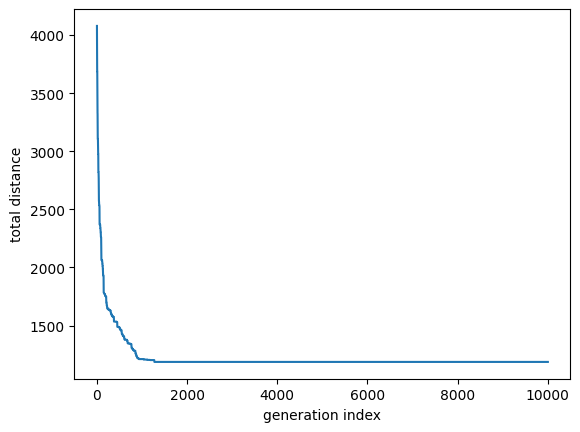

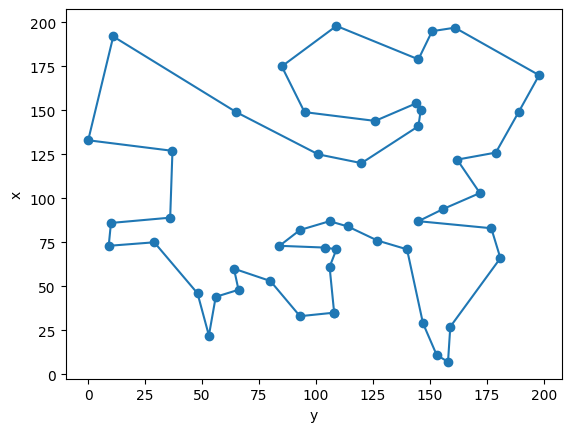

Total distance:1187.3693614858796


In [107]:
# To be completed - Start
bestIndividual, bestFitnessScore, bestFitnessScoresEvolution = runGeneticAlgorithm(
    instance, generationSize = 100, nbElites = 30, nbParents = 50, nbChildren = 70, mutationRate = 0.3, 
    nbGenerations = 10000, maximumSolvingTimeInSeconds = 60, timeCriterion = True)
# To be completed - End

bestDistancesEvolution = 1/np.array(bestFitnessScoresEvolution)
plotEvolution(bestDistancesEvolution)
plotRoute(bestIndividual)
print("Total distance:" + str(1/bestFitnessScore))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

1861 1862 1863 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 

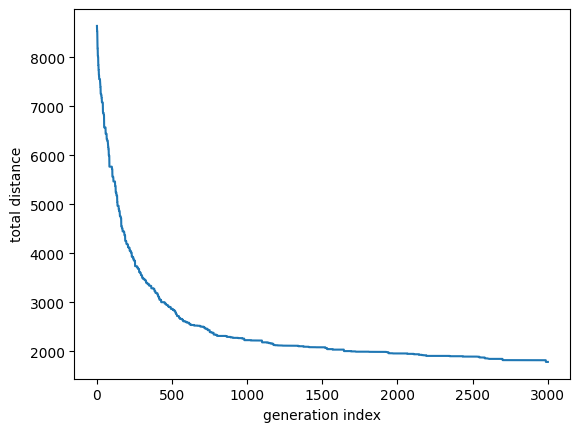

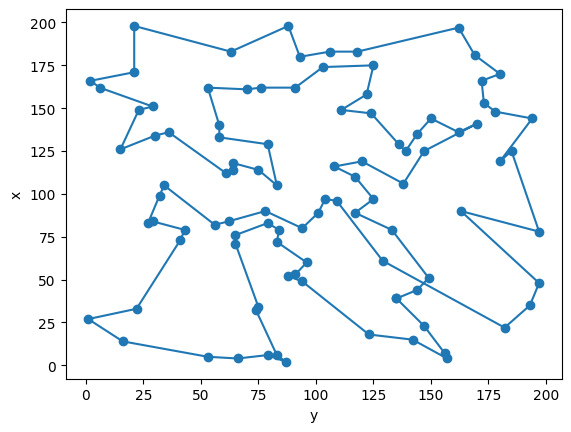

Total distance:1783.3322452623522


In [115]:
fileName = "TSPInstance100.csv"
instance = loadFixedInstance(fileName)
# To be completed - Start
bestIndividual, bestFitnessScore, bestFitnessScoresEvolution = runGeneticAlgorithm(
    instance, generationSize = 300, nbElites = 50, nbParents = 100, nbChildren = 250, mutationRate = 0.25, 
    nbGenerations = 3000, maximumSolvingTimeInSeconds = 20, timeCriterion = True)
# To be completed - End

bestDistancesEvolution = 1/np.array(bestFitnessScoresEvolution)
plotEvolution(bestDistancesEvolution)
plotRoute(bestIndividual)
print("Total distance:" + str(1/bestFitnessScore))

We can see that with 50 nodes it is ok, but more is harder...

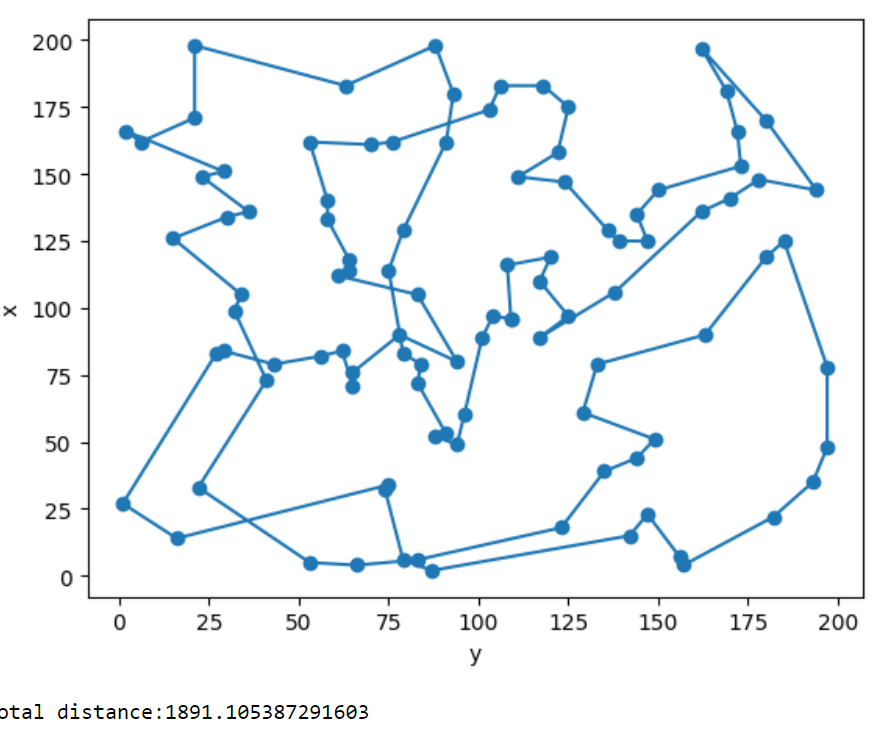

In [1]:
import random
import math

# Define the problem
num_workers = 3
num_jobs = 5
worker_time_windows = [[0, 10], [3, 8], [5, 12]]
job_time_windows = [[0, 5], [1, 6], [2, 7], [3, 8], [4, 9]]
job_durations = [2, 3, 2, 4, 3]

# Define the cost function
def cost_function(solution):
    cost = 0
    for i in range(num_jobs):
        start_time = solution[i]
        end_time = start_time + job_durations[i]
        for j in range(num_workers):
            if start_time >= worker_time_windows[j][0] and end_time <= worker_time_windows[j][1]:
                cost += 1
    return cost

# Define the initial solution
def initial_solution():
    solution = []
    for i in range(num_jobs):
        start_time = random.randint(job_time_windows[i][0], job_time_windows[i][1] - job_durations[i])
        solution.append(start_time)
    return solution

# Define the neighbor function
def neighbor(solution):
    new_solution = solution.copy()
    i = random.randint(0, num_jobs - 1)
    new_start_time = random.randint(job_time_windows[i][0], job_time_windows[i][1] - job_durations[i])
    new_solution[i] = new_start_time
    return new_solution

# Define the acceptance probability function
def acceptance_probability(old_cost, new_cost, temperature):
    if new_cost < old_cost:
        return 1.0
    else:
        return math.exp((old_cost - new_cost) / temperature)

# Define the simulated annealing algorithm
def simulated_annealing():
    # Set initial temperature and cooling rate
    temperature = 1000.0
    cooling_rate = 0.03

    # Initialize current solution and cost
    current_solution = initial_solution()
    current_cost = cost_function(current_solution)

    # Initialize best solution and cost
    best_solution = current_solution
    best_cost = current_cost

    # Loop until temperature is too low
    while temperature > 1.0:
        # Generate a neighbor solution
        neighbor_solution = neighbor(current_solution)
        neighbor_cost = cost_function(neighbor_solution)

        # Determine whether to accept the neighbor solution
        ap = acceptance_probability(current_cost, neighbor_cost, temperature)
        if ap > random.random():
            current_solution = neighbor_solution
            current_cost = neighbor_cost

        # Update the best solution if necessary
        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

        # Decrease the temperature
        temperature *= 1 - cooling_rate

    return best_solution, best_cost

# Run the simulated annealing algorithm
best_solution, best_cost = simulated_annealing()

# Print the best solution and cost
print("Best solution:", best_solution)
print("Best cost:", best_cost)


Best solution: [1, 1, 2, 4, 4]
Best cost: 7


In [3]:
import random

# Define the problem
num_workers = 3
num_jobs = 5
worker_time_windows = [[0, 10], [3, 8], [5, 12]]
job_time_windows = [[0, 5], [1, 6], [2, 7], [3, 8], [4, 9]]
job_durations = [2, 3, 2, 4, 3]

# Define the fitness function
def fitness_function(solution):
    cost = 0
    for i in range(num_jobs):
        start_time = solution[i]
        end_time = start_time + job_durations[i]
        for j in range(num_workers):
            if start_time >= worker_time_windows[j][0] and end_time <= worker_time_windows[j][1]:
                cost += 1
    return cost

# Define the initial population
def initial_population(population_size):
    population = []
    for i in range(population_size):
        individual = []
        for j in range(num_jobs):
            start_time = random.randint(job_time_windows[j][0], job_time_windows[j][1] - job_durations[j])
            individual.append(start_time)
        population.append(individual)
    return population

# Define the selection function
def selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    winner = max(tournament, key=fitness_function)
    return winner

# Define the crossover function
def crossover(parent1, parent2):
    child = []
    for i in range(num_jobs):
        if random.random() < 0.5:
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return child

# Define the mutation function
def mutation(individual, mutation_rate):
    for i in range(num_jobs):
        if random.random() < mutation_rate:
            individual[i] = random.randint(job_time_windows[i][0], job_time_windows[i][1] - job_durations[i])
    return individual

# Define the genetic algorithm
def genetic_algorithm(population_size, tournament_size, crossover_rate, mutation_rate, num_generations):
    # Initialize the population
    population = initial_population(population_size)

    # Loop through generations
    for generation in range(num_generations):
        # Create a new population
        new_population = []

        # Add the best individual from the previous generation
        best_individual = max(population, key=fitness_function)
        new_population.append(best_individual)

        # Generate the rest of the population through selection, crossover, and mutation
        while len(new_population) < population_size:
            parent1 = selection(population, tournament_size)
            parent2 = selection(population, tournament_size)
            child = crossover(parent1, parent2)
            child = mutation(child, mutation_rate)
            new_population.append(child)

        # Update the population
        population = new_population

    # Return the best individual
    best_individual = max(population, key=fitness_function)
    best_fitness = fitness_function(best_individual)
    return best_individual, best_fitness

# Run the genetic algorithm
best_individual, best_fitness = genetic_algorithm(
    population_size=100,
    tournament_size=5,
    crossover_rate=0.8,
    mutation_rate=0.1,
    num_generations=100
)

# Print the best individual and fitness
print("Best individual:", best_individual)
print("Best fitness:", best_fitness)


Best individual: [3, 3, 5, 3, 5]
Best fitness: 12


In [7]:
import random

# Define the problem
num_workers = 3
num_jobs = 5
worker_time_windows = [[0, 10], [3, 8], [5, 12]]
job_time_windows = [[0, 5], [1, 6], [2, 7], [3, 8], [4, 9]]
job_durations = [2, 3, 2, 4, 3]
job_earnings = [10, 15, 12, 18, 13]

# Define the fitness function
def fitness_function(solution):
    total_cost = 0
    total_earnings = 0
    for i in range(num_jobs):
        start_time = solution[i]
        end_time = start_time + job_durations[i]
        worker = -1
        for j in range(num_workers):
            if start_time >= worker_time_windows[j][0] and end_time <= worker_time_windows[j][1]:
                worker = j
                break
        if worker == -1:
            total_cost += float("inf")
        else:
            # Calculate the cost based on the distance traveled by the worker
            if i == 0:
                distance_cost = 0
            else:
                prev_job_end_time = solution[i - 1] + job_durations[i - 1]
                distance_cost = abs(job_time_windows[i][0] - job_time_windows[i - 1][1]) + abs(worker_time_windows[worker][0] - job_time_windows[i][0])
            total_cost += distance_cost
            # Calculate the earnings based on the money earned by the worker for doing the job
            total_earnings += job_earnings[i]
    return total_earnings - total_cost

# Define the initial population
def initial_population(population_size):
    population = []
    for i in range(population_size):
        individual = []
        for j in range(num_jobs):
            start_time = random.randint(job_time_windows[j][0], job_time_windows[j][1] - job_durations[j])
            individual.append(start_time)
        population.append(individual)
    return population

# Define the selection function
def selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    winner = max(tournament, key=fitness_function)
    return winner

# Define the crossover function
def crossover(parent1, parent2):
    child = []
    for i in range(num_jobs):
        if random.random() < 0.5:
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return child

# Define the mutation function
def mutation(individual, mutation_rate):
    for i in range(num_jobs):
        if random.random() < mutation_rate:
            individual[i] = random.randint(job_time_windows[i][0], job_time_windows[i][1] - job_durations[i])
    return individual

# Define the genetic algorithm
def genetic_algorithm(population_size, tournament_size, crossover_rate, mutation_rate, num_generations):
    # Initialize the population
    population = initial_population(population_size)

    # Loop through generations
    for generation in range(num_generations):
        # Create a new population
        new_population = []

        # Add the best individual from the previous generation
        best_individual = max(population, key=fitness_function)
        new_population.append(best_individual)

        # Generate the rest of the population through selection, crossover,


In [8]:
population_size = 50
tournament_size = 5
crossover_rate = 0.8
mutation_rate = 0.1
num_generations = 100

best_solution = genetic_algorithm(population_size, tournament_size, crossover_rate, mutation_rate, num_generations)

print("Best solution found:")
if best_solution is not None:
    print("Best solution found:")
    print(best_solution)
    print("Fitness value:", fitness_function(best_solution))
else:
    print("No feasible solution found within the given number of generations.")


Best solution found:
No feasible solution found within the given number of generations.


make a genetic algorithm to solve this problem: 

there are 3 workers and 13 jobs in different places and they have time windows to do the work. The workers earn money if they do the job. We want to maximze their money. Consider that the distance to move from one job to another is an euclidean distance. The travels the workers do have to consider that they are done in the time window, for that suppose that they move at 50km/h. Also each job has a duration. Finally workers start and finish the day at their home.

In [9]:
import random
import math

# Define problem parameters
NUM_WORKERS = 3
NUM_JOBS = 13
MAX_DURATION = 8  # in hours
MAX_SPEED = 50  # in km/h

# Define chromosome
chromosome_length = NUM_JOBS * NUM_WORKERS
def generate_chromosome():
    return [random.randint(0, NUM_JOBS-1) for _ in range(chromosome_length)]

# Define fitness function
def calculate_fitness(chromosome):
    # Convert chromosome to schedule for each worker
    schedules = [[] for _ in range(NUM_WORKERS)]
    for i in range(chromosome_length):
        worker_index = i % NUM_WORKERS
        job_index = chromosome[i]
        schedules[worker_index].append(job_index)
    
    # Calculate total earnings for each worker
    total_earnings = [0.0 for _ in range(NUM_WORKERS)]
    for worker_index in range(NUM_WORKERS):
        current_time = 0.0  # start at home
        current_x, current_y = jobs[0][:2]  # start at home
        for job_index in schedules[worker_index]:
            # Calculate travel time to job
            job_x, job_y, job_duration, job_window_start, job_window_end, job_pay = jobs[job_index]
            travel_time = math.sqrt((job_x - current_x)**2 + (job_y - current_y)**2) / MAX_SPEED
            arrival_time = current_time + travel_time
            
            # Check if job can be done within time window and before end of day
            if arrival_time >= job_window_start and arrival_time + job_duration <= job_window_end and current_time + travel_time + job_duration <= MAX_DURATION:
                # Add earnings for job
                total_earnings[worker_index] += job_pay
                
                # Update current time and location
                current_time = arrival_time + job_duration
                current_x = job_x
                current_y = job_y
        
        # Calculate travel time back home
        home_x, home_y, _, _, _, _ = jobs[0]
        travel_time = math.sqrt((home_x - current_x)**2 + (home_y - current_y)**2) / MAX_SPEED
        current_time += travel_time
        
    # Return total earnings for all workers
    return sum(total_earnings)


In [15]:
jobs = [
    (0, 0, 0, 0, 24, 0),  # home
    (10, 20, 2, 9, 11, 10),
    (20, 30, 3, 10, 14, 15),
    (30, 10, 1, 7, 8, 5),
    (40, 20, 2, 11, 13, 10),
    (50, 30, 3, 9, 14, 15),
    (60, 10, 1, 8, 9, 5),
    (70, 20, 2, 10, 12, 10),
    (80, 30, 3, 12, 15, 15),
    (90, 10, 1, 7, 8, 5),
    (100, 20, 2, 9, 11, 10),
    (110, 30, 3, 8, 12, 15),
    (120, 10, 1, 10, 11, 5),
]


In [16]:
cromos = generate_chromosome()

In [17]:
calculate_fitness(cromos)

0.0